## Before we start

### In class we've discussed the possibility of rendering visualizations as '.png' files but why?
    Standard interactive visualization is rendered in 'html' format 
    Although '.png' files are static visualizations they are much lighter and have a higher range of implementation
    Lighter can come in handy when you have a lot of visualizations in the same notebook (which traditionally can    get quite slow)
### To render visualizations as '.png' you need to install the 'plotly-orca' extention:
    Open your conda cmd window enter your enviroment that has plotly and simply type:
        'conda install -c plotly plotly-orca'

    If using google Colab, in order to install the orca extension you need to run the following code:

    !pip install plotly==4.0.0
    !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
    !chmod +x /usr/local/bin/orca
    !apt-get install xvfb libgtk2.0-0 libgconf-2-4
        
### Now for any visualization you have you should be able to simply:
    - 'fig.show(renderer='png')' and your visualization should be in '.png' format
    
### Still, dont forget to explore all of the interactive possibilities

## Required Imports

In [1]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [2]:
path_datasets = 'https://raw.githubusercontent.com/nalpalhao/DV_Practival/master/datasets/'
path_lesson = path_datasets + 'Lesson_2/'

## Data Traces Types for this lesson

In [3]:
basic_data_types = ['scatter', 'bar', 'pie', 'heatmap']

## Basic Layout options
    As we've seen in class there are many layout options all following the 'parent - children' structure, here are  some examples of these
    For further layout options/references you can go to:
### https://plot.ly/python/reference/

In [4]:
layout_0 = dict(
            title=dict(
                text='Title', 
                font=dict(family='Arial', size=18, color='black'),
                x=.5,
                y=.9
                ),
            xaxis=dict(
                title='X Axis',
                type=['linear','log'][0],
                range=(0,10)
                ),
            yaxis=dict(
                title='Y Axis',
                type=['linear','log'][0],
                range=(-2,2)
                ),
            height=450, 
            width=700,  
            margin=dict(l=100,t=100,b=100,r=100), #left, top, bottom and right margin space (default=100)
            paper_bgcolor='white',
            plot_bgcolor='azure'
        )

### A small Example

In [5]:
# Let's define some basic data to plot

x = np.linspace(1,10,10)

y = np.sin(x)

### As you might remember from the class, a Figure graph object is divided into two objects, the layout and the data

In [6]:
# Here we define a data object (in a dictionary) of type scatter, with our previously generated datapoints

data_1 = dict(type='scatter', x=x, y=y)

In [7]:
# Now we'll build our Figure object without any layout

fig_1 = go.Figure(data=data_1)

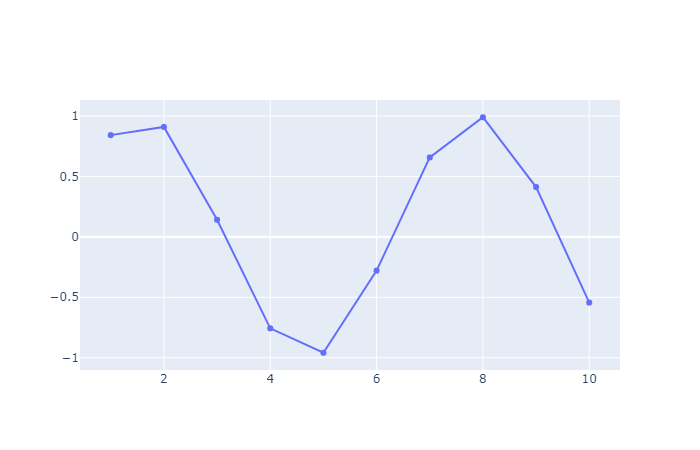

In [8]:
fig_1.show(renderer='png')

# Lets introduce some small layout options

### Title centered
### y and x axis, where y axis has a range(-1,1)
### A smaller visualization (height and width)
### Different background color to the visualization

In [9]:
layout_2 = dict(
            title=dict(
                text='Title', 
                x=.5 #This parameter puts the title text in a position from 0 to 1 acording to the x axis, i.e x=.5 is a centered title
                ),
            xaxis=dict(
                title='X Axis'
                ),
            yaxis=dict(
                title='Y Axis',
                range=(-1,1)
                ),
            height=450, 
            width=700, 
            paper_bgcolor='azure'
        )

In [10]:
fig_2 = go.Figure(data=data_1, layout=layout_2)

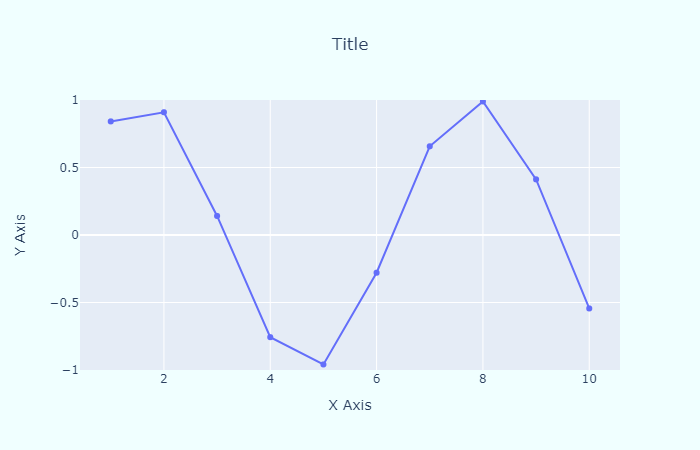

In [11]:
fig_2.show(renderer='png')

# Lets add another trace

In [12]:
y_1 = y

y_2 = np.cos(x)

#Dont forget to name them!

data_1 = dict(type='scatter', x=x, y=y_1, name='Sin')

data_2 = dict(type='scatter', x=x, y=y_2, name='Cos')

In [13]:
# You can add as many data object inside the data array as you want!

fig_2_1 = go.Figure(data=[data_1,data_2], layout=layout_2)

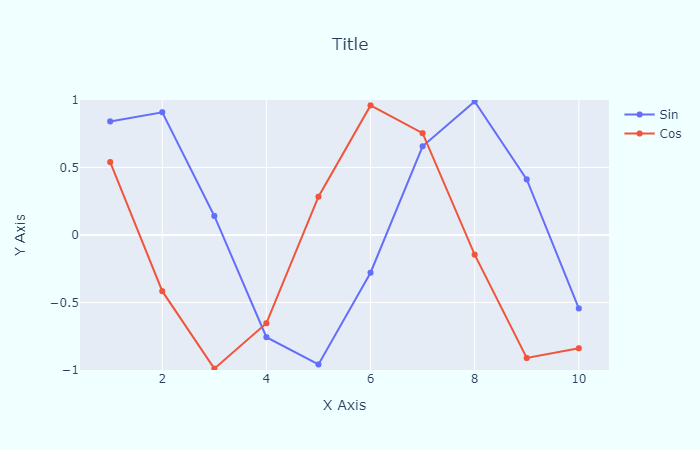

In [14]:
fig_2_1.show(renderer='png')

## Lets use our Emissions Dataset

In [70]:
df = pd.read_csv(path_datasets + 'emissions_full.csv')

HTTPError: HTTP Error 404: Not Found

In [16]:
df.head()

,country_name,year,GHG_emissions,CH4_emissions,N2O_emissions,F_Gas_emissions,CO2_emissions,CH4_emissions.1,N2O_emissions.1,energy_emissions,...,electricity_heat_emissions,construction_emissions,transports_emissions,other_fuels_emissions,other_emissions,subregion,region-wb,continent,iso-a3,iso-a2
0,Afghanistan,1990,15.212848,9.311589,2.984055,0.002180,2.915024,9.311589,2.984055,3.774044,...,NaN,NaN,NaN,NaN,1.242220,Southern Asia,South Asia,Asia,AFG,AF
1,Afghanistan,1991,15.286439,9.516187,3.082194,0.003613,2.684445,9.516187,3.082194,3.376803,...,NaN,NaN,NaN,NaN,1.020851,Southern Asia,South Asia,Asia,AFG,AF
2,Afghanistan,1992,14.010531,9.571483,3.041733,0.005046,1.392269,9.571483,3.041733,1.914300,...,NaN,NaN,NaN,NaN,0.602588,Southern Asia,South Asia,Asia,AFG,AF
3,Afghanistan,1993,14.028118,9.609869,3.089066,0.006479,1.322704,9.609869,3.089066,1.678073,...,NaN,NaN,NaN,NaN,0.413993,Southern Asia,South Asia,Asia,AFG,AF
4,Afghanistan,1994,13.985408,9.789039,2.920713,0.007912,1.267744,9.789039,2.920713,1.456451,...,NaN,NaN,NaN,NaN,0.247331,Southern Asia,South Asia,Asia,AFG,AF


In [17]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', nan, 'South America', 'Oceania',
       'North America', 'Seven seas (open ocean)'], dtype=object)

## Data Manipulation to use in the next examples

In [18]:
# Lets just remove the "continent" 'Seven Seas'

df = df.loc[df['continent'] != 'Seven seas (open ocean)'] # Lets remove the "continent" 'Seven Seas'
df = df.loc[df['country_name'] != 'World']

# First scatter example 'data_3'

my_country = 'Portugal'

df_portugal = df.loc[df['country_name'] == my_country]

df_portugal = df_portugal[['year', 'CO2_emissions']]

# Second scatter example 'data 3_1'

my_country_2 = 'Spain'

df_spain = df.loc[df['country_name'] == my_country_2]

df_spain = df_spain[['year', 'CO2_emissions']]


# Third scatter example 'data_3_2'

my_continent = 'Europe'

continent = df.loc[(df['continent'] == my_continent)]

df_year_by_countries_europe = pd.DataFrame([], columns=continent['country_name'].unique(), index=continent['year'].unique())

for country in continent['country_name'].unique():
    df_year_by_countries_europe[country] = continent.loc[continent['country_name'] == country]['CO2_emissions'].values

# First bar example 'data_4'

my_continent = 'Europe'

year = 2000

df_europe_2000 = df.loc[(df['continent'] == my_continent) & (df['year'] == year)]

# Third bar example 'data_5'

my_continent = 'Europe'

year = 2001

df_europe_2001 = df.loc[(df['continent'] == my_continent) & (df['year'] == year)]

# Forth bar example 'data_6'

my_continent = 'Europe'

continent = df.loc[(df['continent'] == my_continent)]

df_countries_by_year_europe = pd.DataFrame([], columns=continent['year'].unique(), index=continent['country_name'].unique())

for year in continent['year'].unique():
    df_countries_by_year_europe[year] = continent.loc[continent['year'] == year]['CO2_emissions'].values
    
# Since we've already done df_year_by_countries we can simply do

df_countries_by_year_europe = df_year_by_countries_europe.transpose()

# Second pie example

year = 2000

df_pie_2000 = df.loc[df['year'] == year].dropna() # There are some countries without any region in the dataset, let's drop those

labels_1 = df_pie_2000['continent'].unique()

#Sum of all Emissions for each continent
values_1 = [df_pie_2000.loc[df['continent']==region]['CO2_emissions'].sum() for region in df_pie_2000['continent'].unique()]

df_pie_2000 = pd.DataFrame(np.transpose([labels_1,values_1]), columns=['continent', 'CO2_emissions'])


# Second Heatmap example

df_no_nan = df.dropna() # There are some countries without any region in the dataset, let's drop those

x_10 = df_no_nan['year'].unique()
y_10 = df_no_nan['continent'].unique()

z_10 =  [[df_no_nan.loc[(df_no_nan['year'] == year) & (df_no_nan['continent']==continent)]['CO2_emissions'].sum() 
                      for year in x_10] 
                             for continent in y_10]

df_heatmap = pd.DataFrame(z_10, columns=x_10, index=y_10)

# Save these smaller tables

df_portugal.to_csv(path_save + 'df_portugal.csv', index=False)

df_spain.to_csv(path_save + 'df_spain.csv', index=False)

df_year_by_countries_europe.to_csv(path_save + 'df_year_by_countries_europe.csv', index=True) # index is the years

df_europe_2000.to_csv(path_save + 'df_europe_2000.csv', index=False)

df_europe_2001.to_csv(path_save + 'df_europe_2001.csv', index=False)

df_countries_by_year_europe.to_csv(path_save + 'df_countries_by_year_europe.csv', index=True) # index is the years

df_pie_2000.to_csv(path_save + 'df_pie_2000.csv', index=False)

df_heatmap.to_csv(path_save + 'df_heatmap.csv', index=True) #index is the continents

### Load Table Already Filtered to Portugal

In [19]:
df_portugal = pd.read_csv(path_lesson + 'df_portugal.csv')

In [20]:
df_portugal.head()

,year,CO2_emissions
0,1990,43.052460
1,1991,44.757724
2,1992,48.981996
3,1993,47.931004
4,1994,49.520540


## Scatter plot Exercise

In [21]:
x_portugal = df_portugal['year']
y_portugal = df_portugal['CO2_emissions']

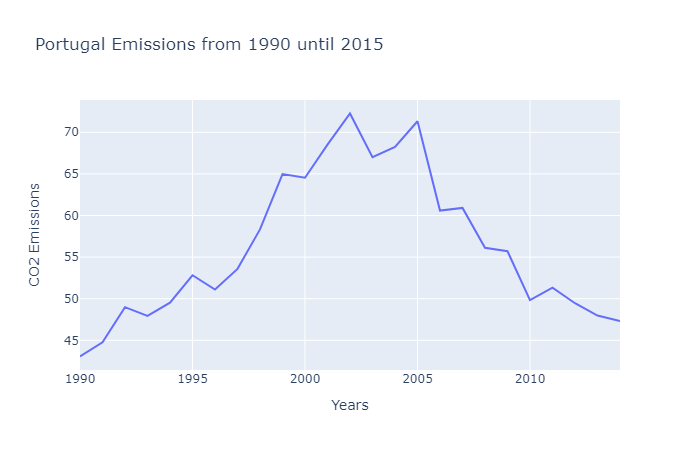

In [22]:
data_3 = dict(type='scatter', x=x_portugal, y=y_portugal)

layout_3 = dict(title=dict(
                    text='Portugal Emissions from 1990 until 2015'
                    ),
             xaxis=dict(title='Years'),
             yaxis=dict(title='CO2 Emissions'))


fig_3 = go.Figure(data=[data_3], layout=layout_3)

fig_3.show(renderer='png')

# Lets add another Country as a trace

In [23]:
df_portugal = pd.read_csv(path_lesson + 'df_portugal.csv')
df_spain = pd.read_csv(path_lesson + 'df_spain.csv')

In [24]:
x_country = df_portugal['year']
y_country = df_portugal['CO2_emissions']

x_country_2 = df_spain['year']
y_country_2 = df_spain['CO2_emissions']

In [25]:
data_1 = dict(type='scatter', x=x_country, y=y_country, name='Portugal', line=dict(color='black'))
data_2 = dict(type='scatter', x=x_country_2, y=y_country_2, name='Spain', line=dict(color='yellow'))

data_3_1 = [data_1,data_2] 

layout_3_1 = dict(title=dict(
                        text='Portugal Emissions from 1990 until 2015'
                        ),
                  xaxis=dict(title='Years'),
                  yaxis=dict(title='CO2 Emissions'))

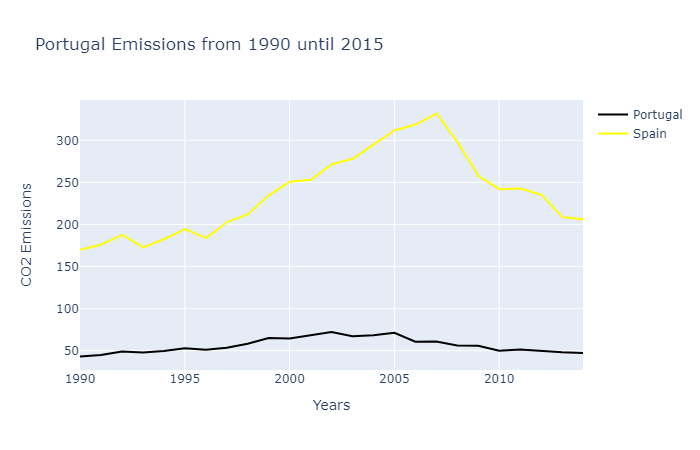

In [26]:
fig_3_1 = go.Figure(data=data_3_1, layout=layout_3_1)

fig_3_1.show(renderer='png')

# What about all Countries in Europe?

In [27]:
df_year_by_countries_europe = pd.read_csv(path_lesson + 'df_year_by_countries_europe.csv', index_col=0) # the index is in the first column of the file col=0

In [28]:
df_year_by_countries_europe.head()

,Albania,Andorra,Austria,Belarus,Belgium,Bulgaria,Croatia,Czech Republic,Denmark,Estonia,...,Portugal,Romania,Russia,Slovakia,Slovenia,Spain,Sweden,Switzerland,Ukraine,United Kingdom
1990,6.164879,0.387248,46.861890,91.577467,105.950219,65.707263,10.107196,141.027675,52.622708,35.939600,...,43.052460,174.594104,2419.552357,46.724478,7.393969,169.973930,33.396579,41.43882,654.558028,542.861068
1991,4.231599,0.387248,51.090514,87.844946,110.748459,46.582111,4.327998,127.121798,63.237407,32.265775,...,44.757724,144.549113,2393.008706,39.510421,6.565239,176.256346,34.376275,43.85234,617.014689,558.185354
1992,2.360079,0.387248,46.237842,77.901630,109.411803,43.961199,3.404920,122.210169,57.441426,23.507480,...,48.981996,128.590264,2222.697586,46.045760,6.017990,187.537194,36.881315,43.81250,529.421889,540.721741
1993,2.200079,0.390912,46.403874,66.220110,107.170971,44.298911,4.044616,119.036158,59.810940,17.916184,...,47.931004,119.525609,2037.920706,34.652660,6.800358,172.815565,36.579027,41.63426,453.869073,528.202930
1994,2.257153,0.387248,46.768914,54.674926,112.390347,41.831279,3.397816,112.697377,63.807884,17.328552,...,49.520540,117.251784,1828.222978,32.041588,6.845622,182.703598,38.535363,40.75746,369.863713,522.869175


In [29]:
# There are 38 countries here, will choose them all (aka all columns)
df_year_by_countries_europe.columns

Index(['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bulgaria',
       'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
       'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Ukraine', 'United Kingdom'],
      dtype='object')

In [30]:
# You could chose to visualize a smaller sample of countries manually here

country_list = df_year_by_countries_europe.columns

# For example

#country_list = ['Portugal', 'Spain', 'Germany']

In [31]:
# This part requires some data manipulation

data_3_2 = [dict(type='scatter',
             x=df_year_by_countries_europe.index,
             y=df_year_by_countries_europe[country],
             name=country)
                            for country in country_list]

In [32]:
layout_3_2 = dict(title=dict(
                        text='All Countries Emissions from 1990 until 2015'
                  ),
                  xaxis=dict(title='Years'),
                  yaxis=dict(title='CO2 Emissions'))

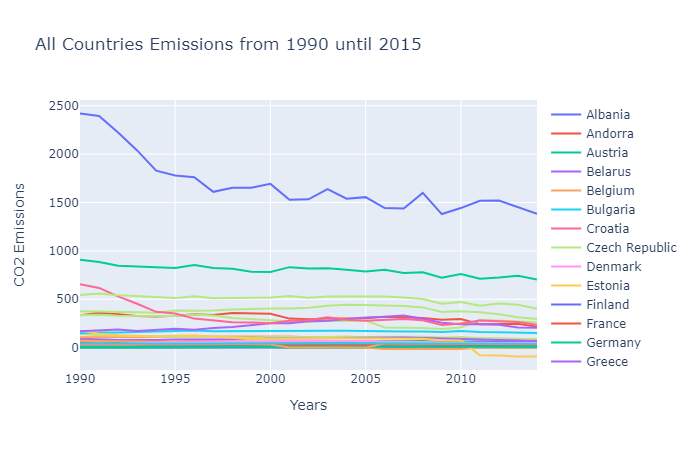

In [33]:
fig_3_2 = go.Figure(data=data_3_2, layout=layout_3_2)

fig_3_2.show(renderer='png')

### For the amount of countries we have it is obviously not the best visualization type option, let's explore others

## Bar Plot example

In [34]:
df_europe_2000 = pd.read_csv(path_lesson + 'df_europe_2000.csv')

In [35]:
x_bar = df_europe_2000['country_name']
y_bar = df_europe_2000['CO2_emissions']

In [36]:
data_4 = dict(type='bar', x=x_bar, y=y_bar)

layout_4 = dict(title=dict(text='Europe Emissions in the year 2000'),
               yaxis=dict(title='Emissions'))

In [37]:
fig_4 = go.Figure(data=data_4, layout=layout_4)

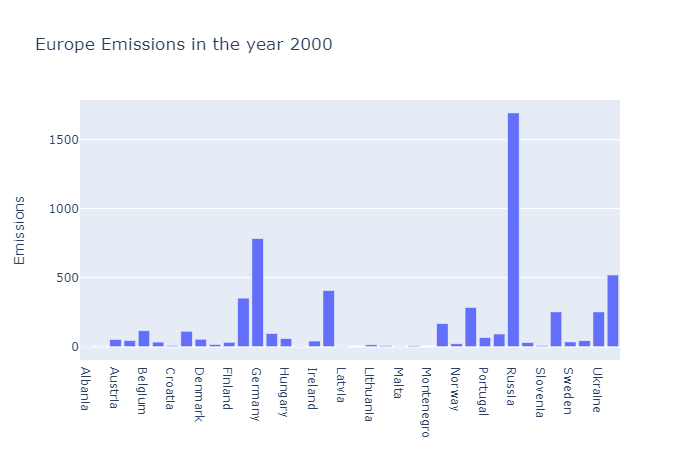

In [38]:
fig_4.show(renderer='png')

### Clearly unproportionate emission ratios are reducing overall comprehension of the visualization 

In [39]:
layout_4_1 = dict(title=dict(text='Europe Emissions in the year 2000'),
                  yaxis=dict(type='log',
                            title='Emissions Log Scaled'))

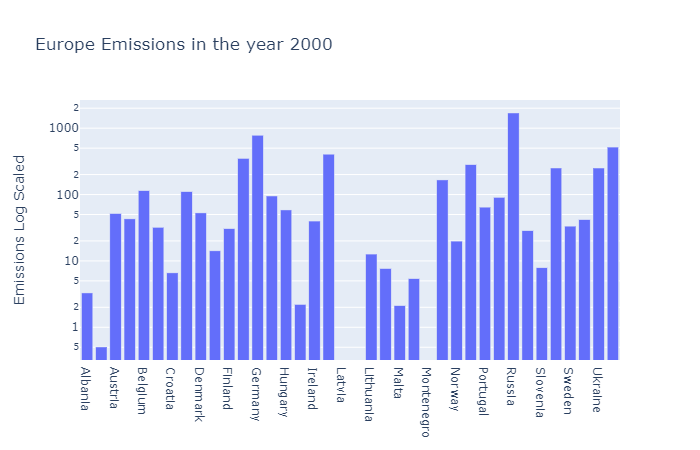

In [40]:
fig_4_1 = go.Figure(data=data_4, layout=layout_4_1)

fig_4_1.show(renderer='png')

### Lets try adding another trace to our Visualization (next year)

In [41]:
df_europe_2000 = pd.read_csv(path_lesson + 'df_europe_2000.csv')
df_europe_2001 = pd.read_csv(path_lesson + 'df_europe_2001.csv')

In [42]:
x_bar_1 = df_europe_2000['country_name']
y_bar_1 = df_europe_2000['CO2_emissions']

x_bar_2 = df_europe_2001['country_name']
y_bar_2 = df_europe_2001['CO2_emissions']

In [43]:
data_5_1 = dict(type='bar', x=x_bar_1, y=y_bar_1, name='Europe in the year 2000', marker=dict(color='black'))
data_5_2 = dict(type='bar', x=x_bar_2, y=y_bar_2, name='Europe in the year 2001', marker=dict(color='yellow'))

data_5 = [data_5_1, data_5_2]

layout_5 = dict(title=dict(text='Europe Emissions in the year 2000 and 2001'),
                  yaxis=dict(type='log',
                            title='Emissions Log Scaled'))

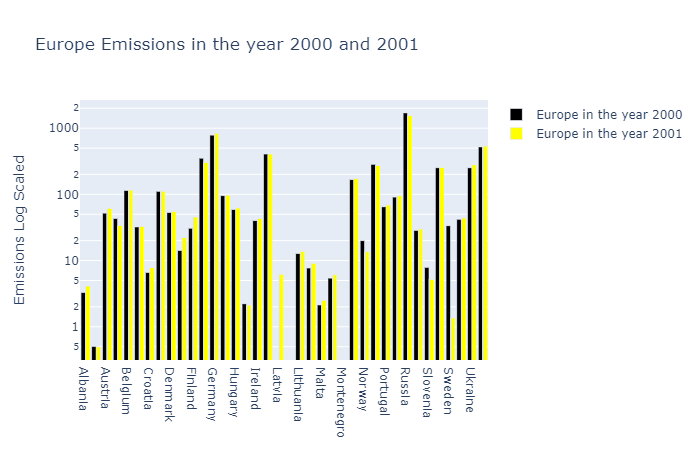

In [44]:
fig_5 = go.Figure(data=data_5, layout=layout_5)

fig_5.show(renderer='png')

### Due to the high amount of Countries the visualization with only one additional trace gets very crowded

In [45]:
layout_5_1 = dict(title=dict(text='Europe Emissions in the year 2000 and 2001'),
                  yaxis=dict(type='log',
                            title='Emissions Log Scaled')
                   ,
                   barmode='stack')

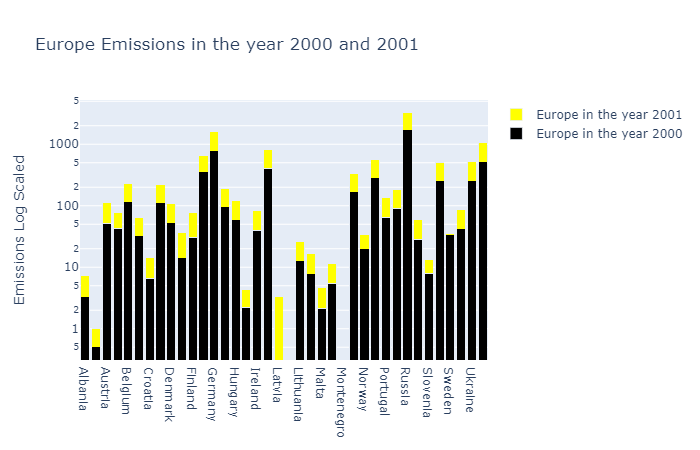

In [46]:
fig_5_1 = go.Figure(data=data_5, layout=layout_5_1)

fig_5_1.show(renderer='png')

## Warning: As you might have noticed in this case the bars migh seems desproportionate, that is only because of the log scale on the y-axis, the 'stack mode' always stacks on top of the previous corresponding trace

### You can see it clearer without the log scale (below), so take that into consideration when implementing some visualizations

In [47]:
layout_5_2 = dict(title=dict(text='Europe Emissions in the year 2000 and 2001'),
                  yaxis=dict(type='linear', #Linear or Standard scale
                            title='Emissions')
                   ,
                   barmode='stack')

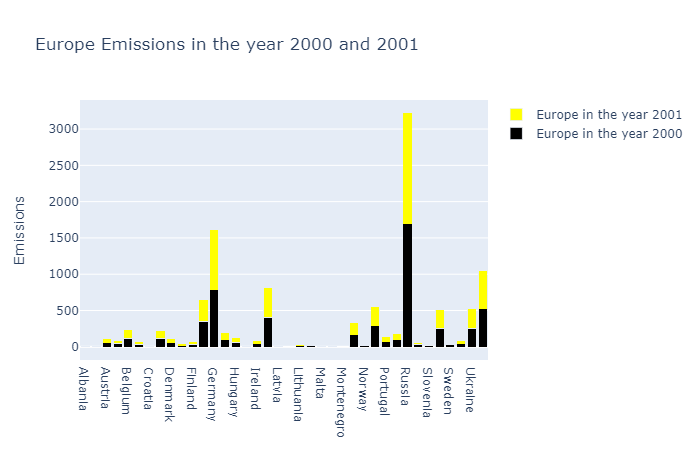

In [48]:
fig_5_2 = go.Figure(data=data_5, layout=layout_5_2)

fig_5_2.show(renderer='png')

# Lets again Visualize all Countries in Europe in all years

In [49]:
df_countries_by_year_europe = pd.read_csv(path_lesson + 'df_countries_by_year_europe.csv', index_col=0) # the index is in the first column of the file col=0

In [50]:
df_countries_by_year_europe.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Albania,6.164879,4.231599,2.360079,2.200079,2.257153,2.070079,2.083348,1.602048,1.921266,3.092052,...,4.954851,3.840622,4.025433,3.958792,4.112696,4.367492,4.688307,4.221205,4.429134,4.857833
Andorra,0.387248,0.387248,0.387248,0.390912,0.387248,0.405568,0.434880,0.445872,0.471520,0.493504,...,0.546328,0.506996,0.499668,0.499668,0.477684,0.477684,0.469226,0.465562,0.454570,0.439914
Austria,46.861890,51.090514,46.237842,46.403874,46.768914,49.647938,53.382607,52.571594,53.191600,51.533279,...,69.729863,70.139756,67.916153,68.116956,61.837164,66.632985,64.093974,61.228567,61.521927,58.079255
Belarus,91.577467,87.844946,77.901630,66.220110,54.674926,47.480350,48.443939,48.982560,47.181933,45.122168,...,38.314592,32.491460,30.920768,33.858724,31.451257,35.567364,58.589377,59.586500,60.058135,59.769001
Belgium,105.950219,110.748459,109.411803,107.170971,112.390347,111.975083,116.975720,113.940791,115.966839,112.436071,...,107.834883,105.597667,101.896499,104.491203,96.902131,105.773427,94.467100,92.480360,93.819752,87.772424


In [51]:
year_list = df_countries_by_year_europe.columns

In [52]:
# This part requires some data manipulation

data_6 = [dict(type='bar',
             name=str(year),
             x=df_countries_by_year_europe.index,
             y=df_countries_by_year_europe[str(year)]
              )
                for year in year_list]

layout_6 = dict(title=dict(text='Europe Emissions from the years 1990 until 2015'),
                  yaxis=dict(type='log', #Linear or Standard scale
                            title='Emissions Log Scaled')
                   ,
                   barmode='stack')

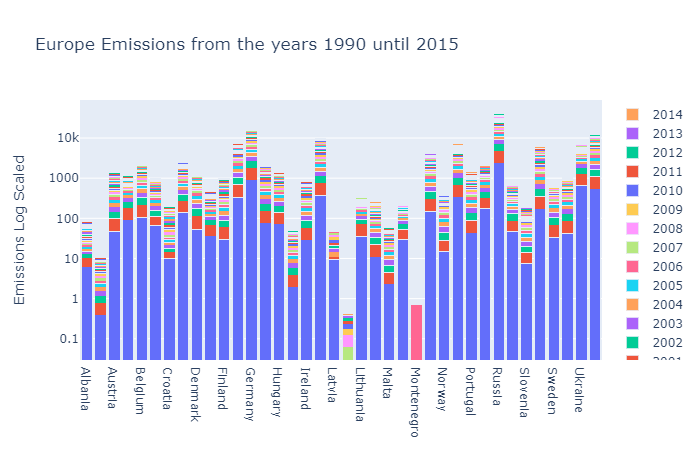

In [53]:
fig_6 = go.Figure(data=data_6, layout=layout_6)

fig_6.show(renderer='png')

### Keep in mind there is some missing data, but more importantly this visualization can only works in terms of comprehension in an interactive environment
### Also due to the high number of countries plotly automatically hides some of their names in the x-axis in smaller visualizations

# Pie Chart

In [54]:
# Naturally pie charts take a different kind of input, here is a very basic example:

labels_0 = ['label 1', 'label 2', 'label 3']

values_0 = [1/10, 3/10, 6/10]

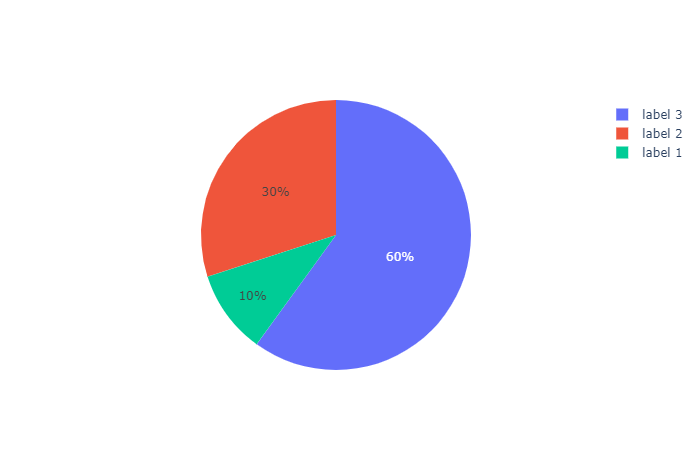

In [55]:
data_7 = dict(type='pie', labels=labels_0, values=values_0)

fig_7 = go.Figure(data=[data_7])

fig_7.show(renderer='png')

# Lets use our dataset

### Visualize the sum of all countries emissions by corresponding region in a given year

In [56]:
df_pie_2000 = pd.read_csv(path_lesson + 'df_pie_2000.csv')

In [57]:
labels_1 = df_pie_2000['continent']

#Sum of all Emissions for each continent
values_1 = df_pie_2000['CO2_emissions']

In [58]:
data_8 = dict(type='pie', labels=labels_1, values=values_1)

layout_8 = dict(title=dict(text='Sum of countries Emissions by Continent in the year 2000'))

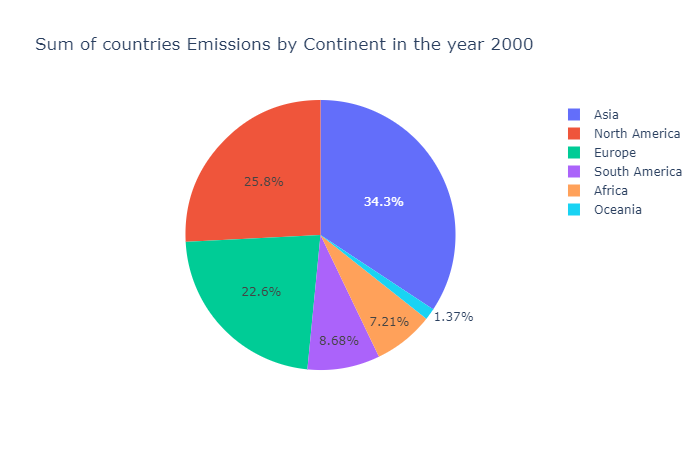

In [59]:
fig_8 = go.Figure(data=[data_8], layout=layout_8)

fig_8.show(renderer='png')

# Heatmap Plot Example

In [60]:
# A small example to give you an idea of the shape of the input data needed to produce this type of visualization

# X and Y should be categorical variables
x_9 = ['x Label 1', 'x label 2']
y_9 = ['y label 1', 'y label 2', 'y label 3']

# Z variable will define the value (represented by color) in the conditions of the X and Y variables
# for example, the first entry array '[1,2]' refers to the values in the conditions:
# X = label 1, Y = label 1 for the value=1 and
# X = label 2, Y = label 1 for the value=2

z_9 = [[1,2], [3,4], [5,5]]

# So to get a grasp of how it would look in a DataFrame

heatmap = pd.DataFrame(z_9, columns=x_9, index=y_9)

heatmap

,x Label 1,x label 2
y label 1,1,2
y label 2,3,4
y label 3,5,5


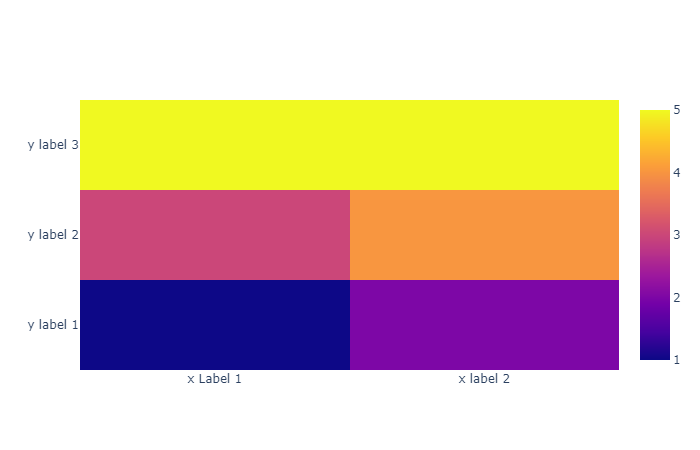

In [61]:
data_9 = dict(type='heatmap', x=x_9, y=y_9, z=z_9)

fig_9 = go.Figure(data=[data_9])

fig_9.show(renderer='png')

## A more Complex example

### For the y labels lets again have the sum of all countries respectivly but this time, by year in the X label

In [62]:
df_heatmap = pd.read_csv(path_lesson + 'df_heatmap.csv', index_col=0) # So since there is an index (continents) we need to specify in wich column it is, i.e first (column=0) 

In [63]:
df_heatmap

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Europe,7104.574260,7000.523913,6553.650664,6239.669946,5912.915085,5877.549435,5925.104817,5667.970780,5688.925165,5629.628494,...,5656.585548,5532.212186,5481.783980,5534.533482,4953.640448,5145.022115,5054.901252,5004.694708,4843.367428,4560.751482
Africa,1656.640175,1661.024791,1670.621988,1687.882605,1692.754899,1721.007589,1771.609135,1773.935226,1816.094172,1759.206336,...,2021.431609,1860.516345,1900.157384,1969.232513,1973.103891,1972.352140,1937.594340,1962.901638,1965.470481,1909.376354
South America,1938.201060,1950.546473,1967.230012,1984.928886,2007.846455,2047.030524,2103.796068,2144.610457,2157.954938,2150.211743,...,2515.407016,1933.542887,1969.495924,2050.095538,2028.333888,2097.337536,1738.552405,1809.464742,1844.080921,1882.247864
Asia,6364.959999,6653.528200,6829.948834,7136.215743,7420.615234,7923.557657,7938.051857,8774.190865,8304.645645,8297.769400,...,12214.718298,13309.286761,13938.148506,14258.032693,15168.975851,16022.025634,17628.035097,18181.177083,18816.480944,19451.764061
Oceania,261.351717,262.498503,267.804674,271.379149,278.110378,288.810733,300.338298,309.816704,330.321015,337.076416,...,439.779163,401.935909,410.108041,412.775884,416.515093,408.750146,337.610860,338.955825,335.063402,325.760411
North America,5413.916556,5380.997447,5468.914412,5596.320769,5717.116849,5766.348519,5937.324560,6128.355653,6251.662834,6244.739049,...,6784.562707,6656.487730,6852.504428,6591.787259,6140.994796,6423.060543,6394.415482,6228.660707,6346.702081,6412.645158


In [64]:
x_10 = df_heatmap.columns
y_10 = df_heatmap.index

z_10 = df_heatmap.values

# Due to the high disparity of values between regions a log scale can be applied here,
# but keep in mind not to produce misleading visualizations

# Also we have to apply a log scaling in this manner because plotly hasn' t yeat implemented that option for color scalling 
#z_10 = np.log(z_10)

In [65]:
# In the data graph object you can also define a colorscale, here is the list of all possible premade colorscales:
colorscale = ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
             'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
             'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
             'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
             'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
             'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
             'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd']

In [66]:
data_10 = dict(type='heatmap', x=x_10, y=y_10, z=z_10, colorscale='inferno')

layout_10 = dict(title=dict(text='Region Emissions from the year 1990 until 2015'))

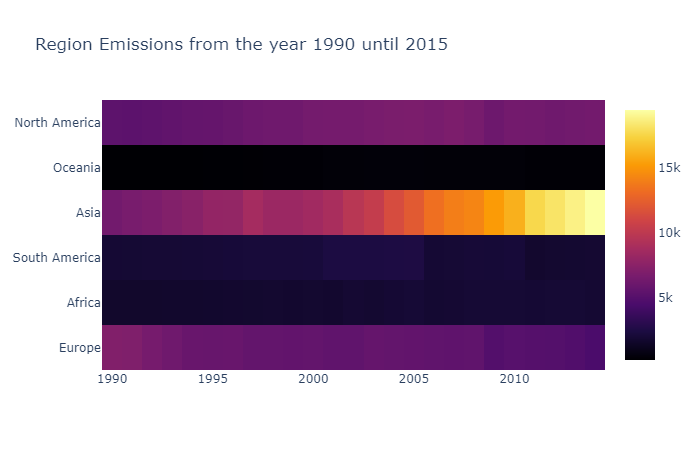

In [67]:
fig_10 = go.Figure(data=[data_10], layout=layout_10)

fig_10.show(renderer='png')